## DQA and Data Cleaning NewCustomerList

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings

%matplotlib inline
pd.set_option("display.max_columns",50)
warnings.filterwarnings(action='ignore')

In [53]:
#loading and reading the file
df_newcustomerlist = pd.read_excel('Raw_data.xlsx',sheet_name='NewCustomerList')
df_newcustomerlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [51]:
df_newcustomerlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   gender                               983 non-null    object        
 2   past_3_years_bike_related_purchases  983 non-null    int64         
 3   DOB                                  983 non-null    datetime64[ns]
 4   job_title                            983 non-null    object        
 5   job_industry_category                983 non-null    object        
 6   wealth_segment                       983 non-null    object        
 7   deceased_indicator                   983 non-null    object        
 8   owns_car                             983 non-null    object        
 9   tenure                               983 non-null    int64         
 10  address       

* There are some **unamed variables** which is of no use for anaysis since so they **can be dropped** from the dataset.
* `last_name` **can be dropped** as there are some missing values in it and first name is enough to proceed for our analysis.

In [54]:
#Dropping unanamed variables
df_newcustomerlist = df_newcustomerlist.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','last_name'],axis=1)
df_newcustomerlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   gender                               1000 non-null   object        
 2   past_3_years_bike_related_purchases  1000 non-null   int64         
 3   DOB                                  983 non-null    datetime64[ns]
 4   job_title                            894 non-null    object        
 5   job_industry_category                835 non-null    object        
 6   wealth_segment                       1000 non-null   object        
 7   deceased_indicator                   1000 non-null   object        
 8   owns_car                             1000 non-null   object        
 9   tenure                               1000 non-null   int64         
 10  address      

### 1. Checking and handling missing values.

In [55]:
df_newcustomerlist.isnull().sum()

first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

* `DOB` has only 17 missing values, so they can be dropped,as imputing dob doesnt make sense.
* whereas `job_title` and `job_industry_category` can be imputed using simple central tendency.

In [56]:
# replacing null values using central tendency
df_newcustomerlist['job_title'].fillna(df_newcustomerlist['job_title'].mode().values[0],inplace=True)
df_newcustomerlist['job_industry_category'].fillna(df_newcustomerlist['job_industry_category'].mode().values[0],inplace=True)

In [57]:
df_newcustomerlist.dropna(inplace=True)
df_newcustomerlist.isnull().sum()

first_name                             0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [58]:
df_newcustomerlist.shape

(983, 17)

* After dropping the null values of DOB the dataset has 983 rows.

### 2. checking for outliers.

<AxesSubplot:xlabel='Rank'>

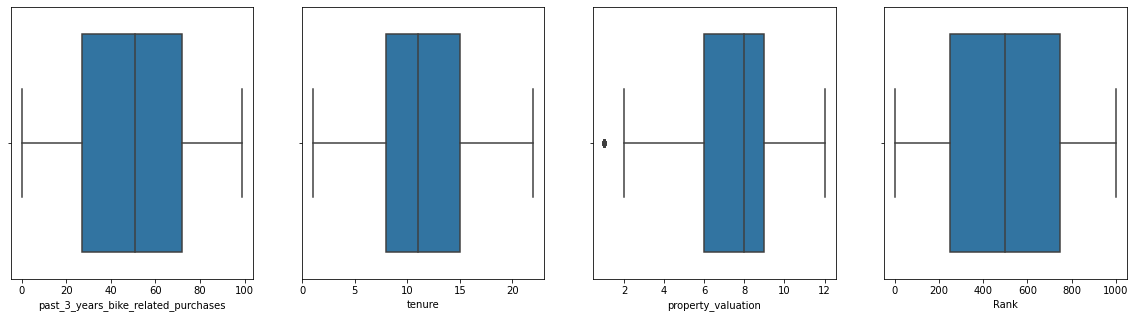

In [59]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.boxplot(df_newcustomerlist['past_3_years_bike_related_purchases'])

plt.subplot(1,4,2)
sns.boxplot(df_newcustomerlist['tenure'])

plt.subplot(1,4,3)
sns.boxplot(df_newcustomerlist['property_valuation'])

plt.subplot(1,4,4)
sns.boxplot(df_newcustomerlist['Rank'])

* Only **property_valuation** has some outliers which can be ignored considering property valuation can be less for many people.

### 3. Feature Engineering
* creating age and age_category variables from DOB.

In [89]:
# custom function to find age as of today

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_newcustomerlist['Age'] = df_newcustomerlist['DOB'].apply(age)

In [91]:
df_newcustomerlist['Age'].head()

0    67
1    54
2    49
3    45
4    58
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

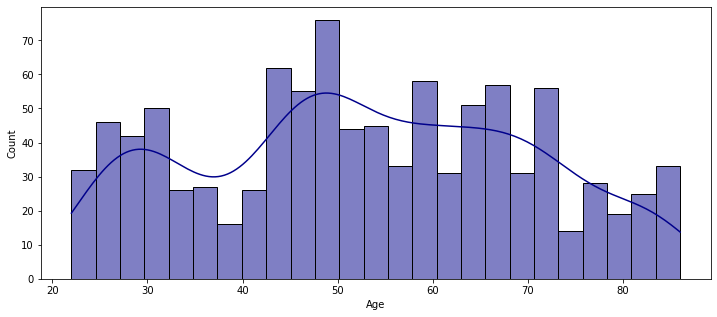

In [148]:
plt.figure(figsize=(12,5))
sns.histplot(df_newcustomerlist['Age'],color='darkblue',kde=True,bins=25)

* So till 20 years there is no data so age category can be divided into `young`, `Adult` and `old`. 

In [141]:
# custom function to create age category

age_cat = []

for i in df_newcustomerlist['Age']:
    if i <= 30:
        age_cat.append('Young')
    elif i > 30 and i <= 55:
        age_cat.append('Adult')
    elif i > 55:
        age_cat.append('Old')

In [142]:
df_newcustomerlist['Age_category'] = age_cat

<AxesSubplot:xlabel='Age_category', ylabel='Count'>

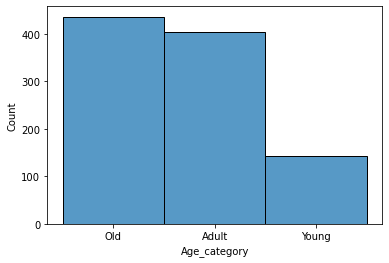

In [151]:
sns.histplot(df_newcustomerlist['Age_category'],palette='rainbow')

* There are more senior citizens in the datset and less young people compared to adults.

### 4. Checking the inconsistency in datset

In [159]:
for i in ['gender','job_industry_category','deceased_indicator','owns_car','Age_category']:
    print(df_newcustomerlist[i].value_counts(),end="\n\n")

Female    513
Male      470
Name: gender, dtype: int64

Financial Services    367
Manufacturing         199
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

N    983
Name: deceased_indicator, dtype: int64

No     497
Yes    486
Name: owns_car, dtype: int64

Old      436
Adult    404
Young    143
Name: Age_category, dtype: int64



### 5. Checking for duplicates

In [162]:
df_newcustomerlist[df_newcustomerlist.duplicated()==True]

,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_category


* There are no duplicates in this dataset.

In [166]:
df_newcustomerlist.to_csv('NewCustomerList_cleaned.csv',index=False)